<p><font size="6"><b>Reshaping data</b></font></p>

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pivoting data

## Cfr. excel

People who know Excel, probably know the **Pivot** functionality:

![](img/pivot_excel.png)

The data of the table:

In [2]:
excelample = pd.DataFrame({'Month': ["January", "January", "January", "January", 
                                  "February", "February", "February", "February", 
                                  "March", "March", "March", "March"],
                   'Category': ["Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment"],
                   'Amount': [74., 235., 175., 100., 115., 240., 225., 125., 90., 260., 200., 120.]})

In [3]:
excelample

,Month,Category,Amount
0,January,Transportation,74.0
1,January,Grocery,235.0
2,January,Household,175.0
3,January,Entertainment,100.0
4,February,Transportation,115.0
5,February,Grocery,240.0
6,February,Household,225.0
7,February,Entertainment,125.0
8,March,Transportation,90.0
9,March,Grocery,260.0


In [4]:
excelample_pivot = excelample.pivot(index="Category", columns="Month", values="Amount")
excelample_pivot

Month,February,January,March
Category,,,
Entertainment,125.0,100.0,120.0
Grocery,240.0,235.0,260.0
Household,225.0,175.0,200.0
Transportation,115.0,74.0,90.0


Interested in *Grand totals*?

In [5]:
# sum columns
excelample_pivot.sum(axis=1)

Category
Entertainment     345.0
Grocery           735.0
Household         600.0
Transportation    279.0
dtype: float64

In [6]:
# sum rows
excelample_pivot.sum(axis=0)

Month
February    705.0
January     584.0
March       670.0
dtype: float64

## Pivot is just reordering your data

Small subsample of the titanic dataset:

In [7]:
df = pd.DataFrame({'Fare': [7.25, 71.2833, 51.8625, 30.0708, 7.8542, 13.0],
                   'Pclass': [3, 1, 1, 2, 3, 2],
                   'Sex': ['male', 'female', 'male', 'female', 'female', 'male'],
                   'Survived': [0, 1, 0, 1, 0, 1]})

In [8]:
df

,Fare,Pclass,Sex,Survived
0,7.2500,3,male,0
1,71.2833,1,female,1
2,51.8625,1,male,0
3,30.0708,2,female,1
4,7.8542,3,female,0
5,13.0000,2,male,1


In [9]:
df.pivot(index='Pclass', columns='Sex', values='Fare')

Sex,female,male
Pclass,,
1,71.2833,51.8625
2,30.0708,13.0000
3,7.8542,7.2500


In [10]:
df.pivot(index='Pclass', columns='Sex', values='Survived')

Sex,female,male
Pclass,,
1,1,0
2,1,1
3,0,0


So far, so good...

Let's now use the full titanic dataset:

In [11]:
df = pd.read_csv("data/titanic.csv")

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


And try the same pivot (*no worries about the try-except, this is here just used to catch a loooong error*):

In [13]:
try:
    df.pivot(index='Sex', columns='Pclass', values='Fare')
except Exception as e:
    print("Exception!", e)

Exception! Index contains duplicate entries, cannot reshape


This does not work, because we would end up with multiple values for one cell of the resulting frame, as the error says: `duplicated` values for the columns in the selection. As an example, consider the following rows of our three columns of interest:

In [14]:
df.loc[[1, 3], ["Sex", 'Pclass', 'Fare']]

,Sex,Pclass,Fare
1,female,1,71.2833
3,female,1,53.1000


Since `pivot` is just restructuring data, where would both values of `Fare` for the same combination of `Sex` and `Pclass` need to go?

Well, they need to be combined, according to an `aggregation` functionality, which is supported by the function`pivot_table`

<div class="alert alert-danger">

<b>NOTE</b>:

 <ul>
  <li>**Pivot** is purely restructuring: a single value for each index/column combination is required.</li>
</ul>
</div>

# Pivot tables - aggregating while pivoting

In [18]:
df = pd.read_csv("data/titanic.csv")

In [19]:
df.pivot_table(index='Sex', columns='Pclass', values='Fare')

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>By default, `pivot_table` takes the **mean** of all values that would end up into one cell. However, you can also specify other aggregation functions using the `aggfunc` keyword.</li>
</ul>
</div>

In [15]:
df.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='max')

Pclass,1,2,3
Sex,,,
female,512.3292,65.0,69.55
male,512.3292,73.5,69.55


In [16]:
df.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>There is a shortcut function for a `pivot_table` with a `aggfunc=count` as aggregation: `crosstab`</li>
</ul>
</div>

In [17]:
pd.crosstab(index=df['Sex'], columns=df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a pivot table with the survival rates (= number of persons survived / total number of persons) for Pclass vs Sex.</li>
  <li>Plot the result as a bar plot.</li>
</ul>
</div>

In [27]:
# %load snippets/06 - Reshaping data20.py
df_pt=df.pivot_table(index='Sex', columns='Pclass', 
               values='Survived')

<AxesSubplot:xlabel='Sex'>

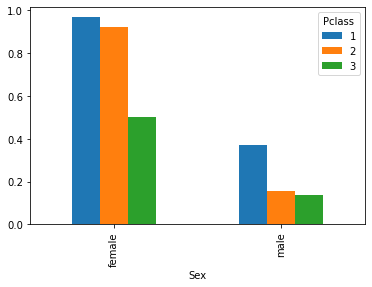

In [28]:
# %load snippets/06 - Reshaping data21.py
df_pt.plot(kind='bar')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a table of the median Fare payed by aged/underaged vs Sex.</li>
</ul>
</div>

In [33]:
# %load snippets/06 - Reshaping data22.py
underaged=df['Age']<18
df['underaged']=underaged
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,underaged
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False


In [37]:
# %load snippets/06 - Reshaping data23.py
df.pivot_table(index='underaged', columns='Sex', values='Fare', aggfunc='median')

Sex,female,male
underaged,,
False,23.250,10.1708
True,22.025,26.0000


# Melt

The `melt` function performs the inverse operation of a `pivot`. This can be used to make your frame longer, i.e. to make a *tidy* version of your data.

In [50]:
pivoted = df.pivot_table(index='Sex', columns='Pclass', values='Fare').reset_index()
pivoted.columns.name = None

In [51]:
pivoted

,Sex,1,2,3
0,female,106.125798,21.970121,16.118810
1,male,67.226127,19.741782,12.661633


Assume we have a DataFrame like the above. The observations (the average Fare people payed) are spread over different columns. In a tidy dataset, each observation is stored in one row. To obtain this, we can use the `melt` function:

In [52]:
pd.melt(pivoted)

,variable,value
0,Sex,female
1,Sex,male
2,1,106.126
3,1,67.2261
4,2,21.9701
5,2,19.7418
6,3,16.1188
7,3,12.6616


As you can see above, the `melt` function puts all column labels in one column, and all values in a second column.

In this case, this is not fully what we want. We would like to keep the 'Sex' column separately:

In [ ]:
pd.melt(pivoted, id_vars=['Sex']) #, var_name='Pclass', value_name='Fare')

# Reshaping with `stack` and `unstack`

The docs say:

> Pivot a level of the (possibly hierarchical) column labels, returning a
DataFrame (or Series in the case of an object with a single level of
column labels) having a hierarchical index with a new inner-most level
of row labels.

Indeed... 
<img src="img/schema-stack.svg" width=50%>

Before we speak about `hierarchical index`, first check it in practice on the following dummy example:

In [59]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 
                   'B':['a', 'b', 'a', 'b'], 
                   'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


To use `stack`/`unstack`, we need the values we want to shift from rows to columns or the other way around as the index:

In [60]:
df = df.set_index(['A', 'B']) # Indeed, you can combine two indices
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [61]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [62]:
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>**stack**: make your data *longer* and *smaller* </li>
  <li>**unstack**: make your data *shorter* and *wider* </li>
</ul>
</div>

## Mimick pivot table 

To better understand and reason about pivot tables, we can express this method as a combination of more basic steps. In short, the pivot is a convenient way of expressing the combination of a `groupby` and `stack/unstack`.

In [84]:
df = pd.read_csv("data/titanic.csv")

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Get the same result as above based on a combination of `groupby` and `unstack`</li>
  <li>First use `groupby` to calculate the survival ratio for all groups</li>
  <li>Then, use `unstack` to reshape the output of the groupby operation</li>
</ul>
</div>

In [77]:
# %load snippets/06 - Reshaping data37.py
df2=df.groupby(['Pclass','Sex']).mean()
df2['Survived'].unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


## Mimick melt

Like the pivot table above, we can now also obtain the result of `melt` with stack/unstack.

Let's use the same `pivoted` frame as above, and look at the final melt result:

In [78]:
pivoted = df.pivot_table(index='Sex', columns='Pclass', values='Fare').reset_index()
pivoted.columns.name = None
pivoted

,Sex,1,2,3
0,female,106.125798,21.970121,16.118810
1,male,67.226127,19.741782,12.661633


In [79]:
pd.melt(pivoted, id_vars=['Sex'], var_name='Pclass', value_name='Fare')

,Sex,Pclass,Fare
0,female,1,106.125798
1,male,1,67.226127
2,female,2,21.970121
3,male,2,19.741782
4,female,3,16.118810
5,male,3,12.661633


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Get the same result as above using `stack`/`unstack` (combined with `set_index` / `reset_index`)</li>
  <li>Tip: set those columns as the index that you do not want to stack</li>
</ul>
</div>

In [117]:
# %load snippets/06 - Reshaping data40.py
df3=df.loc[:,['Sex','Pclass','Fare']]
df3

,Sex,Pclass,Fare
0,male,3,7.2500
1,female,1,71.2833
2,female,3,7.9250
3,female,1,53.1000
4,male,3,8.0500
...,...,...,...
886,male,2,13.0000
887,female,1,30.0000
888,female,3,23.4500
889,male,1,30.0000


In [145]:
# %load snippets/06 - Reshaping data41.py
df3_1=df3.set_index(['Sex','Pclass'])
df3_1

Fare
Sex    Pclass         
male   3        7.2500
female 1       71.2833
       3        7.9250
       1       53.1000
male   3        8.0500
...                ...
       2       13.0000
female 1       30.0000
       3       23.4500
male   1       30.0000
       3        7.7500

[891 rows x 1 columns]

In [143]:
# %load snippets/06 - Reshaping data42.py
df3_1.mean()

Fare    32.204208
dtype: float64

In [ ]:
# %load snippets/06 - Reshaping data43.py

# Exercises: use the reshaping methods with the movie data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so credit to him!) and the datasets he prepared for that. You can download these data from here: [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) and [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8) and put them in the `/data` folder.

In [146]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [147]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Plot the number of actor roles each year and the number of actress roles each year over the whole period of available movie data.</li>
</ul>
</div>

<AxesSubplot:xlabel='year'>

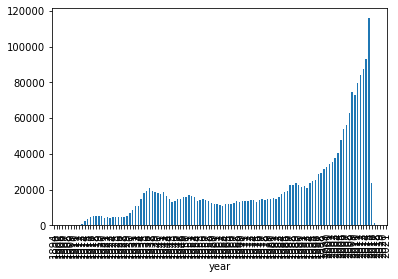

In [162]:
# %load snippets/06 - Reshaping data46.py
df_actor=cast[cast['type']=='actor']
df_actor.groupby('year').aggregate('title').count().plot(kind='bar')

<AxesSubplot:xlabel='year'>

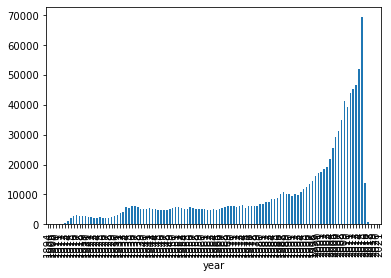

In [163]:
# %load snippets/06 - Reshaping data47.py
df_actress=cast[cast['type']=='actress']
df_actress.groupby('year').aggregate('title').count().plot(kind='bar')

<AxesSubplot:xlabel='year'>

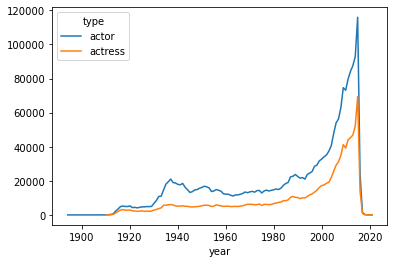

In [171]:
# %load snippets/06 - Reshaping data48.py
df_table=cast.pivot_table(index='year', columns='type', values='title', aggfunc='count')
df_table.plot()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Plot the number of actor roles each year and the number of actress roles each year. Use kind='area' as plot type</li>
</ul>
</div>

<AxesSubplot:xlabel='year'>

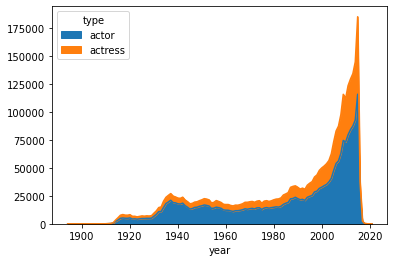

In [172]:
# %load snippets/06 - Reshaping data49.py
df_table.plot(kind='area')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Plot the fraction of roles that have been 'actor' roles each year over the whole period of available movie data.</li>
</ul>
</div>

<AxesSubplot:xlabel='year'>

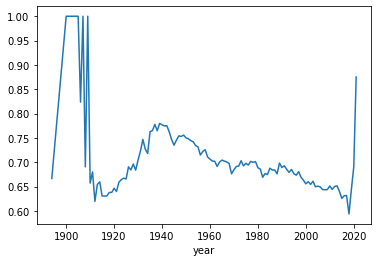

In [187]:
fr=df_table['actor']/df_table.sum(axis=1)
fr.plot()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Define a year as a "Superman year" when films of that year feature more Superman characters than Batman characters. How many years in film history have been Superman years?</li>
</ul>
</div>

In [222]:
# %load snippets/06 - Reshaping data51.py
spi_bat=cast[(cast['character']=='Spiderman') | (cast['character']=='Batman') ]
tab=spi_bat.pivot_table(index='year',columns='character',values='title',aggfunc='count')
tab=tab.fillna(0)
tab[tab['Batman']<tab['Spiderman']].index


Int64Index([1987, 1996], dtype='int64', name='year')

In [237]:
# %load snippets/06 - Reshaping data52.py
spiderman_year='Spiderman year'
cast['year'][cast['year']==1987]=spiderman_year
cast['year'][cast['year']==1996]=spiderman_year
cast[cast['year']=='Spiderman year']

<ipython-input-237-93dd3f138fa4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast['year'][cast['year']==1987]=spiderman_year
<ipython-input-237-93dd3f138fa4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast['year'][cast['year']==1996]=spiderman_year


,title,year,name,type,character,n
38,Violencia urbana,Spiderman year,N?stor 'Kick Boxer',actor,Monta?a,21.0
161,Watch the Shadows Dance,Spiderman year,Brett A'Hearn,actor,Karate Contestant,19.0
163,Lady Blues,Spiderman year,Charles A'Lexis,actor,Clerk,15.0
289,Pusher,Spiderman year,Thomas Aagren,actor,M?rten,23.0
482,Terminal Justice,Spiderman year,Jeffrey Aarles,actor,Biotechie,31.0
...,...,...,...,...,...,...
3333229,Koibitotachino jikoku,Spiderman year,Naoko ?tani,actress,Keiko Kuwayama,NaN
3333510,Fotografdaki kadin,Spiderman year,Sevgi ?zsu,actress,Zuhal,4.0
3333541,Aldri mer 13!,Spiderman year,Marte ?degaard,actress,Classmate,42.0
3333567,Davids bog,Spiderman year,Nulle ?lgaard,actress,Bankdame,NaN
